In [256]:
import numpy as np
import matplotlib.pyplot as plt

### All simultations are run for 100 ps using a time step of 0.004 ps and a constant pressure of 1 atm

### This code can be found at 

In [257]:
import numpy as np

# temperatures = [20, 40, 80, 100, 120, 140]  # K, T0 from simulations

# temperatures = [20, 40, 100, 120, 220, 500] # K, T0 from simulations

temperatures = [20, 100, 120, 220, 500, 1000] # K, T0 from simulations

data_dict = {}

step_index = 0
time_index = 1
total_energy_index = 2
kinetic_energy_index = 3
potential_energy_index = 4
temperature_index = 5
pressure_index = 6

for T in temperatures:
    file_path = f"{T}K/Art.out"  
    data = np.loadtxt(file_path, skiprows=33)  # Load data
    
    # Extract relevant slices
    step = data[:, step_index]
    time = data[:, time_index]
    total_energy = data[:, total_energy_index]
    kinetic_energy = data[:, kinetic_energy_index]
    potential_energy = data[:, potential_energy_index]
    temperature = data[:, temperature_index]
    pressure = data[:, pressure_index]
    
    # Store in dictionary
    data_dict[T] = [step, time, total_energy, kinetic_energy, potential_energy, temperature, pressure]

# Now data_dict[T] gives the corresponding lists of NumPy arrays for each temperature

truncate = 40 # ignore first n data points

pascal_to_atm = 9.86923e-6

# Question 2

The lattice parameter used was $a_{fcc} = 5.256 \r{A}$ from https://www.webelements.com/argon/crystal_structure.html

Starting Temperature: 20 K --> Real Temperature: 18.27
Starting Temperature: 100 K --> Real Temperature: 73.11
Starting Temperature: 120 K --> Real Temperature: 82.18
Starting Temperature: 220 K --> Real Temperature: 89.96
Starting Temperature: 500 K --> Real Temperature: 154.78
Starting Temperature: 1000 K --> Real Temperature: 344.74


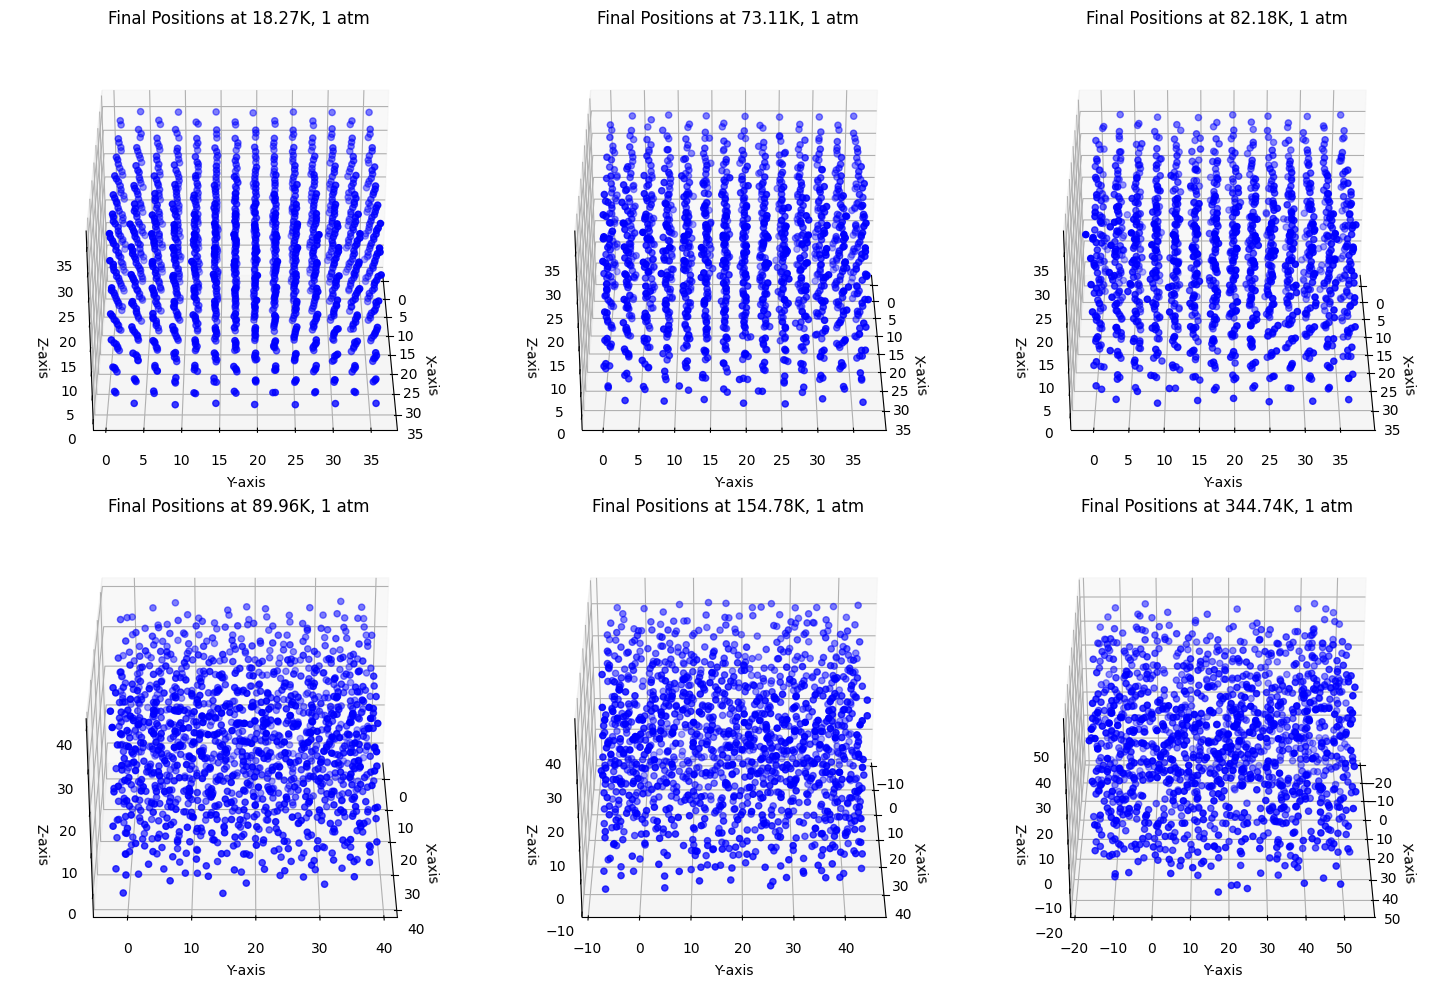

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

real_temp = []

for i, temp in enumerate(temperatures):
    print(f"Starting Temperature: {temp} K --> Real Temperature: {np.mean(data_dict[temp][temperature_index][truncate:]):.2f}")
    real_temp.append(np.mean(data_dict[temp][temperature_index][truncate:]))

fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': '3d'})  # Make all subplots 3D
axes = axes.flatten()  # Flatten for easy iteration

for i, T in enumerate(temperatures):
    positions = np.loadtxt(f"{T}K/time100.d")
    
    x = positions[:, 2]
    y = positions[:, 3]
    z = positions[:, 4]
    
    ax = axes[i]  # Select corresponding subplot
    
    # Plot data
    sc = ax.scatter(x, y, z, c='b', marker='o')

    def update(num):
        ax.view_init(elev=30, azim=num)
        return sc,

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100, blit=True)

    # Set labels for the axes
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    ax.set_title(f'Final Positions at {real_temp[i]:.2f}K, 1 atm')

plt.tight_layout()
plt.show()


## Melting Point based on Visualization

The melting point for Argon is between 82 and 89 K at 1 atm of pressure, evidenced by the disappearance of clear planes. This is consistent with the experimentally determined phase diagram attached to the HW. The larger deviation from $T_0$ at large $T_0$ is due to the latent heat of melting (or phase changes as a whole) while smaller deviations from $T_0$ at low T are due to the potential not being completely harmonic.

## Equilibrium Energies

Starting Temperature: 20 K --> Equilibrium TE: -107.15 [eV], KE: 3.24 [eV], PE: -110.39 [eV]
Starting Temperature: 100 K --> Equilibrium TE: -82.65 [eV], KE: 12.97 [eV], PE: -95.61 [eV]
Starting Temperature: 120 K --> Equilibrium TE: -77.44 [eV], KE: 14.57 [eV], PE: -92.01 [eV]
Starting Temperature: 220 K --> Equilibrium TE: -56.20 [eV], KE: 15.95 [eV], PE: -72.15 [eV]
Starting Temperature: 500 K --> Equilibrium TE: -13.38 [eV], KE: 27.45 [eV], PE: -40.83 [eV]
Starting Temperature: 1000 K --> Equilibrium TE: 42.62 [eV], KE: 61.14 [eV], PE: -18.51 [eV]


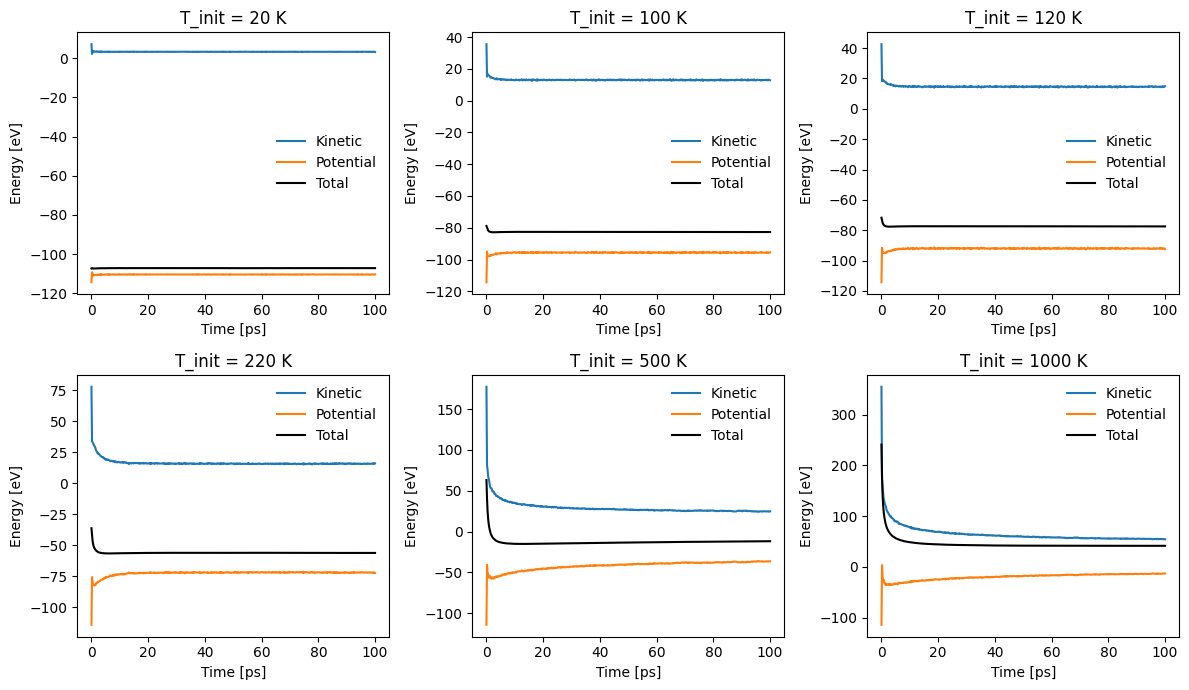

In [259]:
import matplotlib.pyplot as plt

for i, temp in enumerate(temperatures):
    print(f"Starting Temperature: {temp} K --> Equilibrium TE: {np.mean(data_dict[temp][total_energy_index][truncate:]):.2f} [eV], KE: {np.mean(data_dict[temp][kinetic_energy_index][truncate:]):.2f} [eV], PE: {np.mean(data_dict[temp][potential_energy_index][truncate:]):.2f} [eV]")

fig, axes = plt.subplots(2, 3, figsize=(12, 7))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration (i.e. [0, 1] --> [2], [1, 2] --> [5])

for i, T in enumerate(temperatures):
    ax = axes[i]  # Select the corresponding subplot
    
    # Extract time and quantity of interest 
    time = data_dict[T][time_index]  # Time data
    kinetic_energy = data_dict[T][kinetic_energy_index]  
    potential_energy = data_dict[T][potential_energy_index]  
    total_energy = data_dict[T][total_energy_index]  
    
    # Plot data
    ax.plot(time, kinetic_energy, label = 'Kinetic')
    ax.plot(time, potential_energy, label = 'Potential')
    ax.plot(time, total_energy, color = 'k', label = 'Total',)
    
    # Formatting
    ax.set_title(f"T_init = {T} K")
    ax.set_xlabel("Time [ps]")
    ax.set_ylabel("Energy [eV]")
    ax.legend(frameon = False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show();

Equilibrium has been reached when the initial dip in kinetic/potential energy has ended, and the oscillations start to persist. Based on the plots above, this (equilibrium) begins after a few picoseconds. To be safe, I truncate the first 4 picoseconds (first 20 steps) corresponding to a time step of 0.004 ps. The choice of total duration was made based off of the previous assignment where 100 ps seemed sufficient (overkill, even) to equilibrate the smaller system. Given that knowledge, I tried 100 ps here, and it once again seems sufficient.

## Equilibrium Temperatures

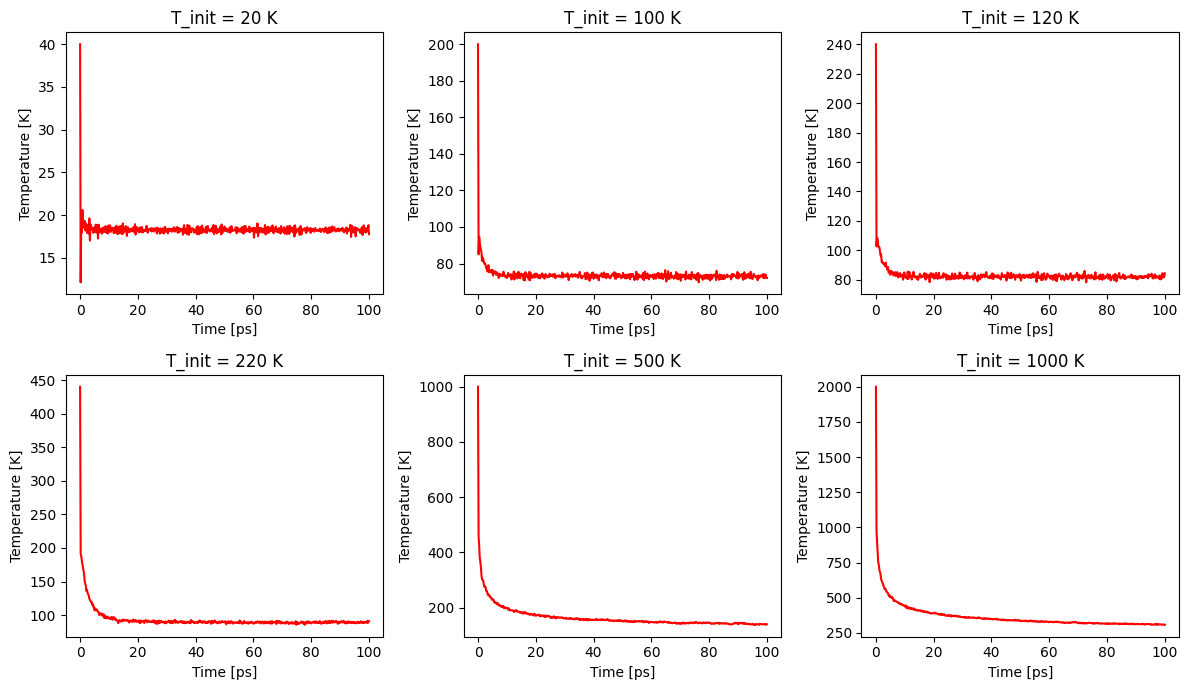

Starting Temperature (T0): 20 K --> Real Temperature: 18.27 K
Starting Pressure (P0): 1 atm --> Real Pressure: 1.09 atm

Starting Temperature (T0): 100 K --> Real Temperature: 73.11 K
Starting Pressure (P0): 1 atm --> Real Pressure: 1.30 atm

Starting Temperature (T0): 120 K --> Real Temperature: 82.18 K
Starting Pressure (P0): 1 atm --> Real Pressure: 2.51 atm

Starting Temperature (T0): 220 K --> Real Temperature: 89.96 K
Starting Pressure (P0): 1 atm --> Real Pressure: 17.28 atm

Starting Temperature (T0): 500 K --> Real Temperature: 154.78 K
Starting Pressure (P0): 1 atm --> Real Pressure: 160.87 atm

Starting Temperature (T0): 1000 K --> Real Temperature: 344.74 K
Starting Pressure (P0): 1 atm --> Real Pressure: 363.38 atm



In [260]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 7))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration (i.e. [0, 1] --> [2], [1, 2] --> [5])

for i, T in enumerate(temperatures):
    ax = axes[i]  # Select the corresponding subplot
    
    # Extract time and quantity of interest (e.g., pressure)
    time = data_dict[T][time_index]  # Time data
    real_temperature = data_dict[T][temperature_index]  # Pressure data (or replace with another quantity)
    
    # Plot data
    ax.plot(time, real_temperature, color="r")
    
    # Formatting
    ax.set_title(f"T_init = {T} K")
    ax.set_xlabel("Time [ps]")
    ax.set_ylabel("Temperature [K]")

# Adjust layout for better spacing
plt.tight_layout()
plt.show();

for i, temp in enumerate(temperatures):
    print(f"Starting Temperature (T0): {temp} K --> Real Temperature: {np.mean(data_dict[temp][temperature_index][truncate:]):.2f} K")
    print(f"Starting Pressure (P0): 1 atm --> Real Pressure: {np.mean(data_dict[temp][pressure_index][truncate:]*pascal_to_atm):.2f} atm\n" )

The average temperatures after equilibration are written above, and they vary from $T_0$ since there is no thermostat rescaling velocities after initially setting them via the Maxwell-Boltzmann distribution. As such, the temperatures change from $T_0$ over time until they settle at an equilibrium value.

# Question 3

If the data had enough points around some melting point $T_m$ for a given pressure, I would imagine there would be a discontinuity between $T_m - \delta T$ and $T_m$ indicative of a phase change. There does seem to be such a discontinuity around 83 K, but it's hard to tell whether or not that corresponds to $T_M$ since there are so few points in the region.

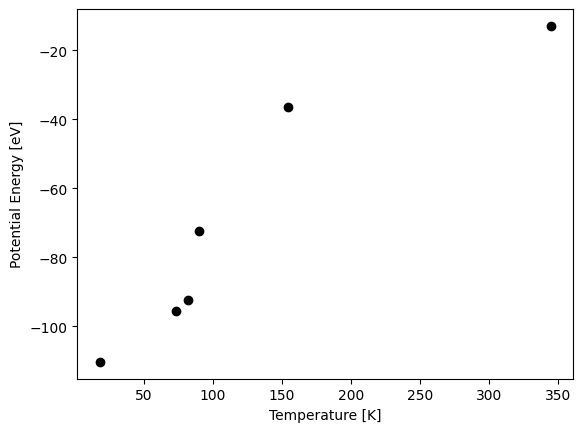

In [261]:
last_potential_energy = []

for i, T in enumerate(temperatures):
    last_potential_energy.append(data_dict[T][potential_energy_index][-1]) # get last value from potential energy at each temperature

plt.scatter(real_temp, last_potential_energy, color = 'k')
plt.xlabel("Temperature [K]")
plt.ylabel("Potential Energy [eV]")
plt.show();

# Question 4

## Finding Boltzmann Distribution from Data

These results are from a simulation with 1 atm initial pressure and 20 K initially whose average temperature after equilibration was ~18 K

Temperature from Equipartition Theorem: 17.75 K


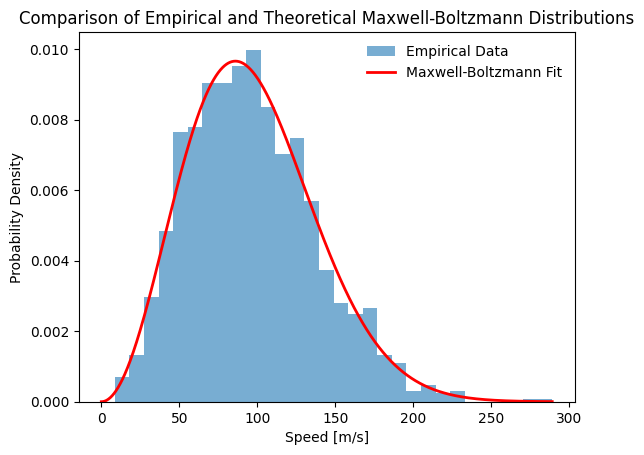

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

angstrom_pico_to_meter_second = 100

# Load velocity data 
data = np.loadtxt("20K/time100.d")  
Vx, Vy, Vz = (data[:, 5])*angstrom_pico_to_meter_second, (data[:, 6])*angstrom_pico_to_meter_second, (data[:, 7])*angstrom_pico_to_meter_second

# Compute speed magnitudes
speeds = np.sqrt(Vx**2 + Vy**2 + Vz**2)

# Estimate temperature using equipartition theorem: (1/2) m <v^2> = (3/2) k_B T
argon_m = 6.6358803987e-26  # Replace with actual mass of the particle in kg
k_B = 1.380649e-23  # Boltzmann constant (J/K)
T = (argon_m * np.mean(speeds**2)) / (3 * k_B)

print(f"Temperature from Equipartition Theorem: {T:.2f} K")

# Theoretical Maxwell-Boltzmann distribution
v = np.linspace(0, np.max(speeds), 1000)
theoretical_mb = maxwell.pdf(v, scale=np.sqrt(k_B * T / argon_m)) # scale argument defined as `a` from https://mathworld.wolfram.com/MaxwellDistribution.html

# Plot histogram of speeds
plt.hist(speeds, bins=30, density=True, alpha=0.6, label="Empirical Data")

# Plot theoretical Maxwell-Boltzmann distribution
plt.plot(v, theoretical_mb, 'r-', lw=2, label="Maxwell-Boltzmann Fit")

plt.xlabel("Speed [m/s]")
plt.ylabel("Probability Density")
plt.legend(frameon = False)
plt.title("Comparison of Empirical and Theoretical Maxwell-Boltzmann Distributions")
plt.show()


The simulation is in good agreement with the fit Maxwell-Boltzmann distribution! Any deviations, subtle as they may be, can arise given that I took single data points for the velocity rather than averaging over time.

# Question 5

Running the $T_0 = 20$ K simulation with free BC:

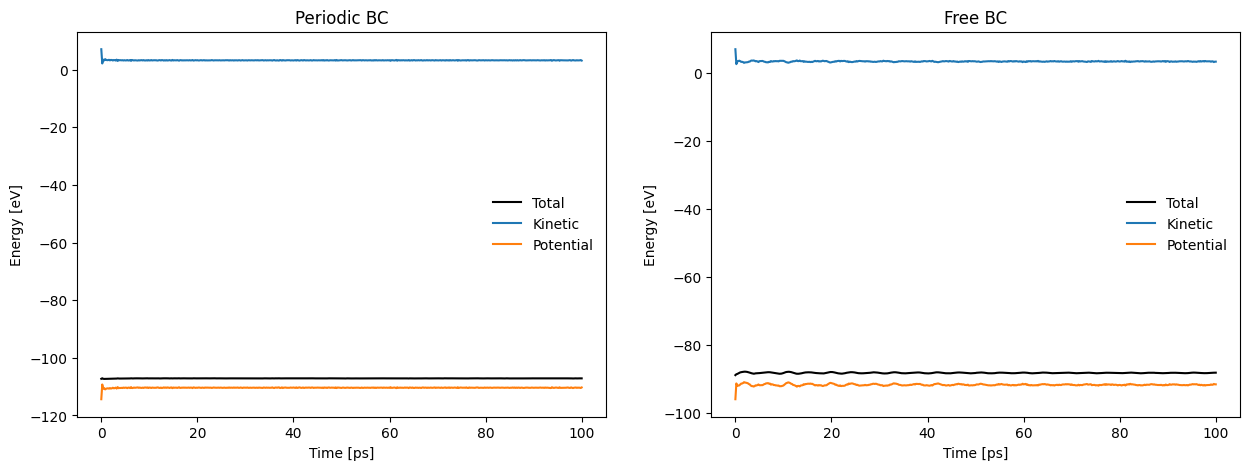

In [263]:
energy_paths = ["20K/Art.out", "20K_freebc/Art.out"]

periodic_bc_data = np.loadtxt("20K/Art.out", skiprows=33)
free_bc_data = np.loadtxt("20K_freebc/Art.out", skiprows=33)

periodic_bc_energies = [periodic_bc_data[:, time_index], periodic_bc_data[:, total_energy_index], periodic_bc_data[:, kinetic_energy_index], periodic_bc_data[:, potential_energy_index]]
free_bc_energies = [free_bc_data[:, time_index], free_bc_data[:, total_energy_index], free_bc_data[:, kinetic_energy_index], free_bc_data[:, potential_energy_index]]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(periodic_bc_energies[0], periodic_bc_energies[1], color = 'k', label = "Total")
ax[0].plot(periodic_bc_energies[0], periodic_bc_energies[2], label = "Kinetic")
ax[0].plot(periodic_bc_energies[0], periodic_bc_energies[3], label = "Potential")
ax[0].set_title("Periodic BC")

ax[1].plot(free_bc_energies[0], free_bc_energies[1], color = 'k', label = "Total")
ax[1].plot(free_bc_energies[0], free_bc_energies[2], label = "Kinetic")
ax[1].plot(free_bc_energies[0], free_bc_energies[3], label = "Potential")
ax[1].set_title("Free BC")

for i in range(2):
    ax[i].legend(frameon = False)
    ax[i].set_xlabel("Time [ps]")
    ax[i].set_ylabel("Energy [eV]")

plt.show();

The potential energy of the free boundary condition system is more positive, indicative of the surface energy decreasing the favorability of the system's configuration when compared to the more negative value of the periodic BC potential energy. As time passes, the Free BC system undergoes structural rearranging to mitigate surface energy, manifesting itself as larger variations in potential energy and a  longer time needed to equilibrate.

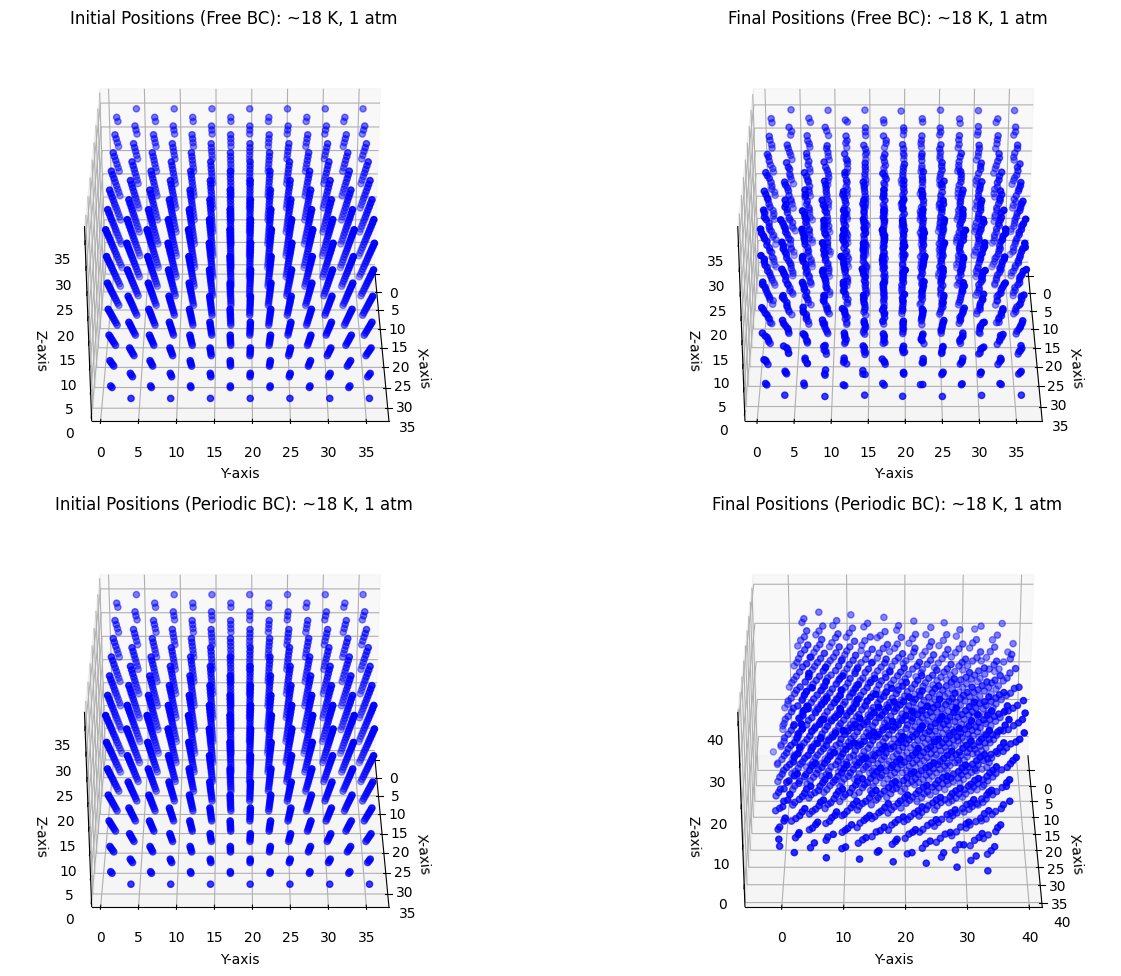

In [264]:
paths = ["20K/time000.d", "20K/time100.d", "20K_freebc/time000.d", "20K_freebc/time100.d"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': '3d'})  # Make all subplots 3D
axes = axes.flatten()  # Flatten for easy iteration

for i, path in enumerate(paths):
    positions = np.loadtxt(path)
    
    x = positions[:, 2]
    y = positions[:, 3]
    z = positions[:, 4]

    ax = axes[i]  # Select corresponding subplot
    
    # Plot data
    sc = ax.scatter(x, y, z, c='b', marker='o')

    def update(num):
        ax.view_init(elev=30, azim=num)
        return sc,

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100, blit=True)

    # Set labels for the axes
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    if i > 1:
        if i%2 == 0:
            ax.set_title(f'Initial Positions (Periodic BC): ~18 K, 1 atm')
        else:
            ax.set_title(f'Final Positions (Periodic BC): ~18 K, 1 atm')
    else:
        if i%2 == 0:
            ax.set_title(f'Initial Positions (Free BC): ~18 K, 1 atm')
        else:
            ax.set_title(f'Final Positions (Free BC): ~18 K, 1 atm')

plt.tight_layout()
plt.show()

Imposition of free BC rather than periodic BC leads to the introduction of surface energy, causing the particles to change their packing type to minimize it. In the periodic BC case, surface energy isn't present thus packing in FCC manner is still stable.